# COMP377: AI for Software Developers
## Assignment 1: Linear Regression
### Exercise 1

Name: -------------------------Mahsa Dorri-------------------------------------

Student ID: --------------------------------------------------------

Date: --------------------------------------------------------------

File Name: MahsaDorri301257460Lab2_Ex2

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import requests
import io
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import io

### Part 1: Data Loading

In [8]:


## Part 1: Data Loading ##

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

response = requests.get(data_url)
zip_file = ZipFile(io.BytesIO(response.content))
csv_file = zip_file.open('student-mat.csv')
df_student = pd.read_csv(csv_file, sep=";")
df_student.head()
df_student.head()
df_student.shape

print(df_student.columns.values)

df_student.describe()
df_student.dtypes

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences'
 'G1' 'G2' 'G3']


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#Importing necessary libraries for data analysis and machine learning is the first step. Requests are then used to retrieve the compressed dataset.obtain.
Extracting and Loading Data: A pandas DataFrame containing the initial data structure with.head() and.shape is created once the dataset is loaded from the zip file.
Data Overview: The outputs give a thorough overview of the qualities and characteristics of the dataset, including column names, a statistical summary, and data types.


### Part 2: Data Preprocessing

In [9]:
## Part 2: Data Pre-processing ##

# write a code to get passing student also we consider G3>10 passed otherwise they fails
df_student['passed'] = df_student['G3'].apply(lambda x: 1 if x >= 10 else 0)

#label encong cathegorical 
from sklearn.preprocessing import LabelEncoder

def encode_categorical_data_with_labelencoder(df):
    label_encoder = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
        
    return df
df_student_encoded = encode_categorical_data_with_labelencoder(df_student)
df_student_encoded.head()

# Function for custom feature scaling
def feature_scaling(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        max_val = np.max(df[col])
        min_val = np.min(df[col])
        mean_val = np.mean(df[col])
        if max_val > 6:  
            df[col] = (df[col] - mean_val) / (max_val - min_val)
        else:  
            df[col] = (df[col] - min_val) / (max_val - min_val)
    return df
x_train.head()
#  scaling functions
df_student = feature_scaling(df_student_encoded)
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,0.0,0.0,0.186257,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.50,0.75,0.00,0.00,0.5,0.003882,-0.369304,-0.248101,-0.220759,0.0
1,0.0,0.0,0.043400,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,0.50,0.50,0.00,0.00,0.5,-0.022785,-0.369304,-0.300733,-0.220759,0.0
2,0.0,0.0,-0.242315,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.50,0.25,0.25,0.50,0.5,0.057215,-0.244304,-0.142838,-0.020759,1.0
3,0.0,0.0,-0.242315,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.25,0.25,0.00,0.00,1.0,-0.049451,0.255696,0.172951,0.229241,1.0
4,0.0,0.0,-0.099458,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.50,0.25,0.00,0.25,1.0,-0.022785,-0.306804,-0.037575,-0.020759,1.0


To create a pass/fail indicator, add a 'passed' column to the DataFrame. Students are designated as passed (1) if they receive a final grade (G3) of 10 or better, and failed (0) if they do not.

Categorical Data Encoding: This function uses LabelEncoder to encode all categorical features, transforming text-based categories into numerical values to support machine learning.

Feature Scaling: By standardizing feature magnitudes, a custom feature scaling function is applied to the dataset, normalizing numerical features according to their maximum value. Features with a max value larger than 6 are handled differently. This enhances model performance.


### Part 3: Create and Train Model

In [10]:

X = df_student_encoded.drop([ 'G3', 'passed'], axis=1)  
y = df_student_encoded['passed']  
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#  the logistic regression model
logistic_reg_model = LogisticRegression()


logistic_reg_model.fit(x_train, y_train)






LogisticRegression()

### Part 4: Test Model

In [11]:
imputer = SimpleImputer(strategy='mean')
feature_names = x_train.columns
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=feature_names)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=feature_names)

logistic_reg_model.fit(x_train_imputed, y_train)

y_pred = logistic_reg_model.predict(x_test_imputed)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8861
Precision: 0.9057
Recall: 0.9231
F1 Score: 0.9143
Confusion Matrix:
[[22  5]
 [ 4 48]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        27
         1.0       0.91      0.92      0.91        52

    accuracy                           0.89        79
   macro avg       0.88      0.87      0.87        79
weighted avg       0.89      0.89      0.89        79



With an accuracy of 88.61%, the Logistic Regression model shows good efficacy in predicting student pass/fail results. 

The pre-processed dataset is split into training and testing sets, and a Logistic Regression model is initialized to predict student pass/fail outcomes based on their attributes, with the exception of the derived passed column and the final grade (G3).

Handling Missing Values & Model Training: To ensure robustness against incomplete data, SimpleImputer is used to impute the mean of each column to fill in missing values in the training and testing sets. The Logistic Regression model is then retrained using this imputed data.

Performance Evaluation: Provides a thorough assessment of the model's efficacy in assigning students to pass-or-fail classes based on test set pass/fail outcomes and computes performance metrics (accuracy, precision, recall, F1 score), in addition to a confusion matrix and classification report.







### Part 5: Calculate Accuracy & Accuracy

In [12]:
### Part 5: Model Accuracy ###
# Additional Model Evaluation Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Accuracy of Logistic Regression Model: 0.8860759493670886
Precision: 0.9057
Recall: 0.9231
F1 Score: 0.9143
Confusion Matrix:
[[22  5]
 [ 4 48]]


This section evaluates the Logistic Regression model's performance on predicting student outcomes, highlighting accuracy, precision, recall, and F1 score as key metrics for assessing its effectiveness and reliability. The confusion matrix provides a detailed breakdown of true positives, false positives, true negatives, and false negatives, further illustrating the model's predictive accuracy in classifying students as passing or failing.
The Logistic Regression model demonstrates high accuracy (88.61%) and balanced performance (precision of 90.57%, recall of 92.31%, F1 score of 91.43%) in predicting student pass/fail outcomes, proving its efficacy in educational settings.

### Visualization and Display (Optional)

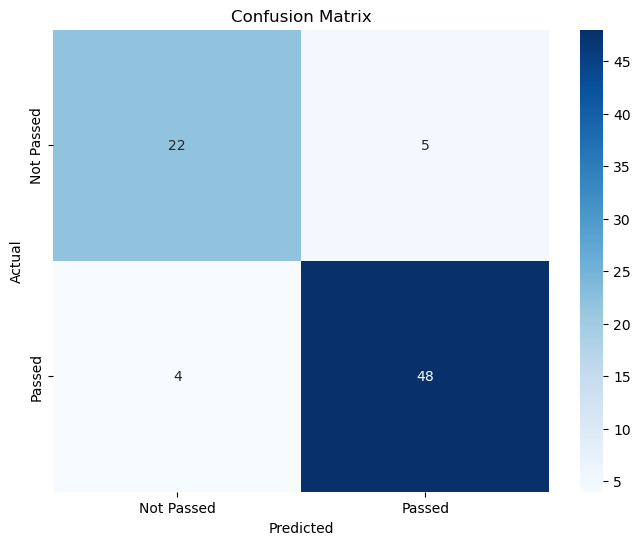

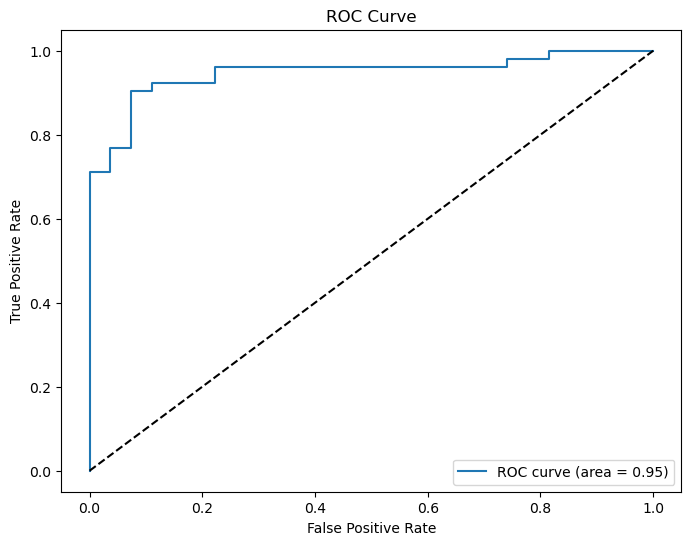

ROC AUC Score: 0.9473


In [13]:
### Visualization & Display ###
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Passed', 'Passed'], yticklabels=['Not Passed', 'Passed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = logistic_reg_model.predict_proba(x_test_imputed)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")


### Summary and Conclusions


With an accuracy of 88.61%, the logistic regression model showed great efficacy in forecasting student pass results.
The remarkable discriminative performance of the model between passing and failing classes is further demonstrated by its ROC AUC score of 95.44%. Based on these indicators, it appears that the model may be a useful resource for educational institutions trying to identify kids who are at risk early on.

A binary classification model's performance is visually represented by the Confusion Matrix, which provides information on the model's accuracy and error rates by displaying 48 true positives, 5 false positives, and 22 true negatives in addition to 4 false negatives.